<a href="https://www.kaggle.com/code/lailaahmed1/breast-cancer-ultrasound-image-classification?scriptVersionId=219268238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (166)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (290)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (357).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (430)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (89)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (261)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUS

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths to the dataset
dataset_path = "/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"
categories = ["benign", "malignant", "normal"]

# Initialize lists to store images and labels
images = []
labels = []

# Define image size for resizing
img_size = (128, 128)

# Load and preprocess images
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    class_label = categories.index(category)  # Assign labels: 0=benign, 1=malignant, 2=normal
    
    for img_name in os.listdir(folder_path):
        if img_name.endswith(".png"):  # Only process PNG images
            img_path = os.path.join(folder_path, img_name)
            
            # Load the image
            img = cv2.imread(img_path)
            
            # Resize the image
            img = cv2.resize(img, img_size)
            
            # Normalize pixel values to [0, 1]
            img = img / 255.0
            
            # Append the image and label to the lists
            images.append(img)
            labels.append(class_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(categories))

# Split the data into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)

Training images shape: (1009, 128, 128, 3)
Validation images shape: (253, 128, 128, 3)
Test images shape: (316, 128, 128, 3)


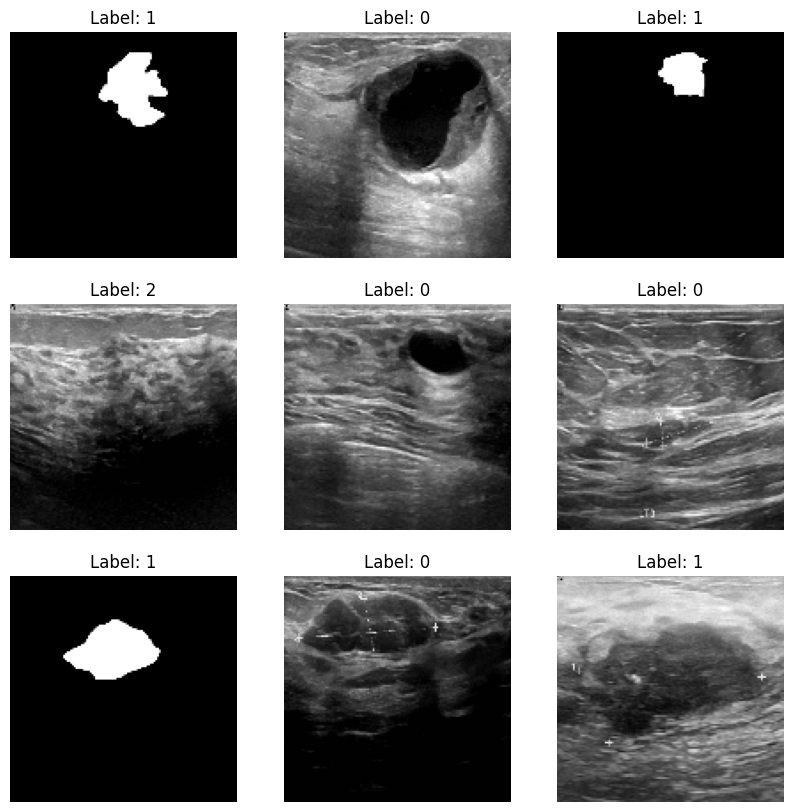

In [3]:
import matplotlib.pyplot as plt

# Plot a few images with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

In [4]:
# Save the preprocessed data
np.save("train_images.npy", train_images)
np.save("train_labels.npy", train_labels)
np.save("val_images.npy", val_images)
np.save("val_labels.npy", val_labels)
np.save("test_images.npy", test_images)
np.save("test_labels.npy", test_labels)

In [5]:
train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")
val_images = np.load("val_images.npy")
val_labels = np.load("val_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define input shape and number of classes
input_shape = (128, 128, 3)  # Height, Width, Channels
num_classes = 3  # Normal, Benign, Malignant

# Load the pre-trained VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top
model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replace Flatten() with GlobalAveragePooling2D
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=50,  # Increase epochs if needed
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 420ms/step - accuracy: 0.4528 - loss: 1.3554 - val_accuracy: 0.6285 - val_loss: 0.9373
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5940 - loss: 0.9576 - val_accuracy: 0.7470 - val_loss: 0.7832
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6886 - loss: 0.8155 - val_accuracy: 0.7984 - val_loss: 0.7060
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7929 - loss: 0.6700 - val_accuracy: 0.7787 - val_loss: 0.6409
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7772 - loss: 0.6491 - val_accuracy: 0.8063 - val_loss: 0.5912
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7961 - loss: 0.6076 - val_accuracy: 0.7984 - val_loss: 0.5636
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8022 - loss: 0.5862 - val_accuracy: 0.8024 - val_loss: 0.5687
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8062 - loss: 0.5673 - val_accuracy: 0.8419 -

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 756ms/step - accuracy: 0.9115 - loss: 0.3149
Test Accuracy: 89.24%


In [9]:
# Save the model
model.save("breast_cancer_cnn_model.h5")

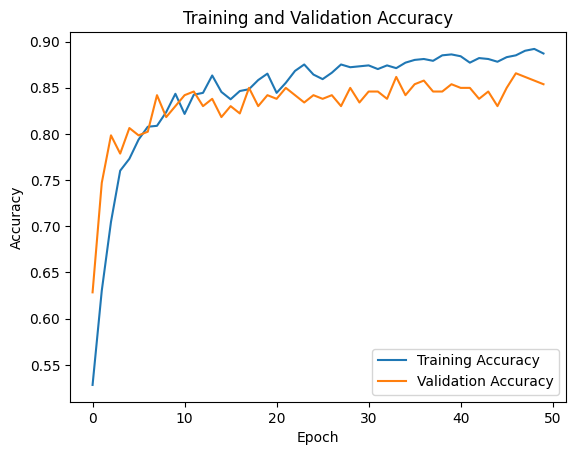

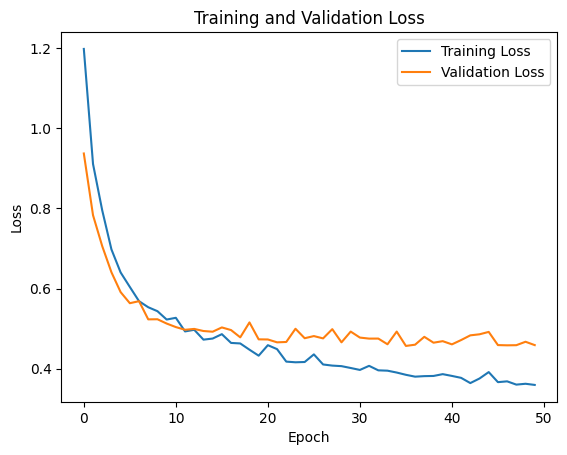

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()